In [58]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot as plt
style.use('fivethirtyeight')
rc={'font.family': ['avenir'],
    'axes.edgecolor': '0',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.titleweight':'bold',
    'axes.labelsize':15,
    'axes.labelcolor': '0',
    'axes.labelpad':10,
    'axes.titlesize': 20,
    'axes.titlepad':15,
    'font.family': ['Avenir'],
    'axes.facecolor':'#f2f2f2', 
    'figure.facecolor':'white',
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.major.pad': 0,
    'xtick.major.pad': 5,
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.minor.width': 100,
    'xtick.color':'0'}


sns.set(font_scale=1, rc=rc)

In [59]:
songList = pd.read_csv('songlist2.csv',index_col=0)

In [60]:
moods = ['happy','sad','energetic','calm']
for x in moods:
    print(x,': ',len(songList[songList['p_mood']==x]))

happy :  1278
sad :  1266
energetic :  1025
calm :  1114


In [61]:
a = list(songList.columns)
a.remove('analysis_url')
a.remove('track_href')
a.remove('type')
a.remove('uri')
a.remove('id')
print(a)
songList[a]

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'p_creator', 'p_mood', 'p_name', 'speechiness', 'tempo', 'time_signature', 'valence']


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,p_creator,p_mood,p_name,speechiness,tempo,time_signature,valence
0,0.26000,0.598,184013.0,0.687,0.000000,7.0,0.1120,-9.021,1.0,Catarina Rocha Leite,energetic,energetic songs,0.0955,75.169,4.0,0.626
1,0.03840,0.720,175427.0,0.791,0.000000,1.0,0.1570,-4.689,1.0,Catarina Rocha Leite,energetic,energetic songs,0.1240,102.071,4.0,0.756
2,0.00413,0.897,212014.0,0.634,0.000000,4.0,0.0686,-6.264,0.0,Catarina Rocha Leite,energetic,energetic songs,0.1610,112.048,4.0,0.506
3,0.53000,0.756,176267.0,0.789,0.000711,2.0,0.1570,-7.002,1.0,Catarina Rocha Leite,energetic,energetic songs,0.0324,127.987,4.0,0.873
4,0.07590,0.647,221320.0,0.834,0.000000,1.0,0.3780,-3.258,1.0,Catarina Rocha Leite,energetic,energetic songs,0.0956,98.074,4.0,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.72700,0.560,309600.0,0.442,0.000017,5.0,0.1100,-7.224,1.0,anniekate,sad,sad songs for sad nights,0.0243,146.448,4.0,0.212
4679,0.83500,0.376,215829.0,0.468,0.000000,7.0,0.0998,-7.793,1.0,anniekate,sad,sad songs for sad nights,0.0328,154.651,3.0,0.463
4680,0.20000,0.360,319253.0,0.716,0.000000,7.0,0.5810,-6.181,1.0,anniekate,sad,sad songs for sad nights,0.3400,86.001,4.0,0.274
4681,0.84500,0.407,269493.0,0.317,0.000003,10.0,0.1390,-7.895,1.0,anniekate,sad,sad songs for sad nights,0.0429,81.899,4.0,0.216


In [62]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.count()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,p_creator,p_name,speechiness,tempo,time_signature,track_href,type,uri,valence
p_mood,,,,,,,,,,,,,,,,,,,,
calm,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
energetic,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
happy,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278
sad,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266


In [63]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
p_mood,,,,,,,,,,,,,
calm,0.782379,0.476615,187787.827648,0.223337,0.541155,4.813285,0.126819,-17.533287,0.746858,0.059050,106.144178,3.771993,0.283001
energetic,0.193787,0.638681,209808.610732,0.698014,0.066681,5.308293,0.182711,-6.229204,0.628293,0.088164,122.047116,3.947317,0.497906
happy,0.145066,0.658360,202201.988263,0.734283,0.011211,5.111111,0.183681,-5.871275,0.676056,0.079436,120.147600,3.984351,0.609895
sad,0.521349,0.577463,217087.144550,0.424203,0.026368,5.120853,0.146726,-9.141970,0.654818,0.089919,115.843166,3.875197,0.311979


In [46]:
songList.groupby(by=['p_mood']).corr()

acousticness  danceability  duration_ms    energy  \
p_mood                                                                          
calm      acousticness          1.000000     -0.379826    -0.316680 -0.862434   
          danceability         -0.379826      1.000000    -0.036144  0.452374   
          duration_ms          -0.316680     -0.036144     1.000000  0.296170   
          energy               -0.862434      0.452374     0.296170  1.000000   
          instrumentalness      0.700659     -0.435828    -0.392006 -0.756919   
          key                  -0.007814      0.042435     0.009353  0.058598   
          liveness             -0.259950      0.104401     0.134175  0.270774   
          loudness             -0.705110      0.552183     0.320933  0.846957   
          mode                  0.010585     -0.014803     0.030971 -0.027945   
          speechiness          -0.065366      0.264864    -0.091261  0.113505   
          tempo                -0.197264      0.108537    -0.016862  0.247400   
          time_signature       -0.151884      0.141976     0.096325  0.168701   
          valence              -0.386484      0.539461    -0.104422  0.471962   
energetic acousticness          1.000000     -0.197387     0.054534 -0.706736   
          danceability         -0.197387      1.000000    -0.114974  0.133165   
          duration_ms           0.054534     -0.114974     1.000000 -0.127658   
          energy               -0.706736      0.133165    -0.127658  1.000000   
          instrumentalness      0.004979      0.073260     0.053252 -0.027018   
          key                   0.043009      0.053669     0.038016 -0.051573   
          liveness             -0.113454     -0.082654    -0.006342  0.177145   
          loudness             -0.538213      0.133792    -0.143459  0.732397   
          mode                  0.107962     -0.066042     0.011923 -0.083138   
          speechiness          -0.038964      0.105726    -0.132457  0.062803   
          tempo                -0.174479     -0.124082    -0.058888  0.152038   
          time_signature       -0.097370      0.183795     0.004855  0.130054   
          valence              -0.217069      0.466765    -0.123415  0.318410   
happy     acousticness          1.000000     -0.016603    -0.103133 -0.328797   
          danceability         -0.016603      1.000000    -0.090681 -0.162287   
          duration_ms          -0.103133     -0.090681     1.000000  0.144351   
          energy               -0.328797     -0.162287     0.144351  1.000000   
          instrumentalness      0.028681     -0.018387     0.032281  0.039653   
          key                  -0.006459      0.020042    -0.055836 -0.026532   
          liveness             -0.021682     -0.094667     0.022791  0.150392   
          loudness             -0.269938     -0.036278     0.015920  0.606068   
          mode                  0.031253     -0.129878     0.040344  0.025184   
          speechiness           0.120715     -0.010414    -0.176850 -0.178257   
          tempo                -0.026095     -0.280134    -0.002805  0.068915   
          time_signature       -0.070572      0.106064    -0.020758  0.018227   
          valence              -0.005037      0.290437     0.019636  0.223978   
sad       acousticness          1.000000     -0.267787    -0.067246 -0.702555   
          danceability         -0.267787      1.000000    -0.266496  0.191101   
          duration_ms          -0.067246     -0.266496     1.000000  0.025399   
          energy               -0.702555      0.191101     0.025399  1.000000   
          instrumentalness      0.011739     -0.057393     0.061237 -0.024117   
          key                  -0.006058      0.058808    -0.061721  0.034606   
          liveness             -0.065465      0.037660    -0.031202  0.109003   
          loudness             -0.522885      0.140988     0.039666  0.741318   
          mode                  0.133174     -0.147012     

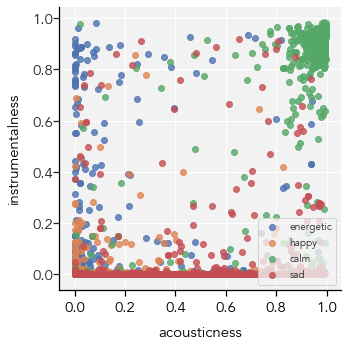

In [50]:
# library & dataset
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="acousticness", y="instrumentalness", data=songList, fit_reg=False, hue='p_mood', legend=False)
plt.set_title()
# Move the legend to an empty part of the plot
plt.legend(loc='lower right',prop={"size":10})
 

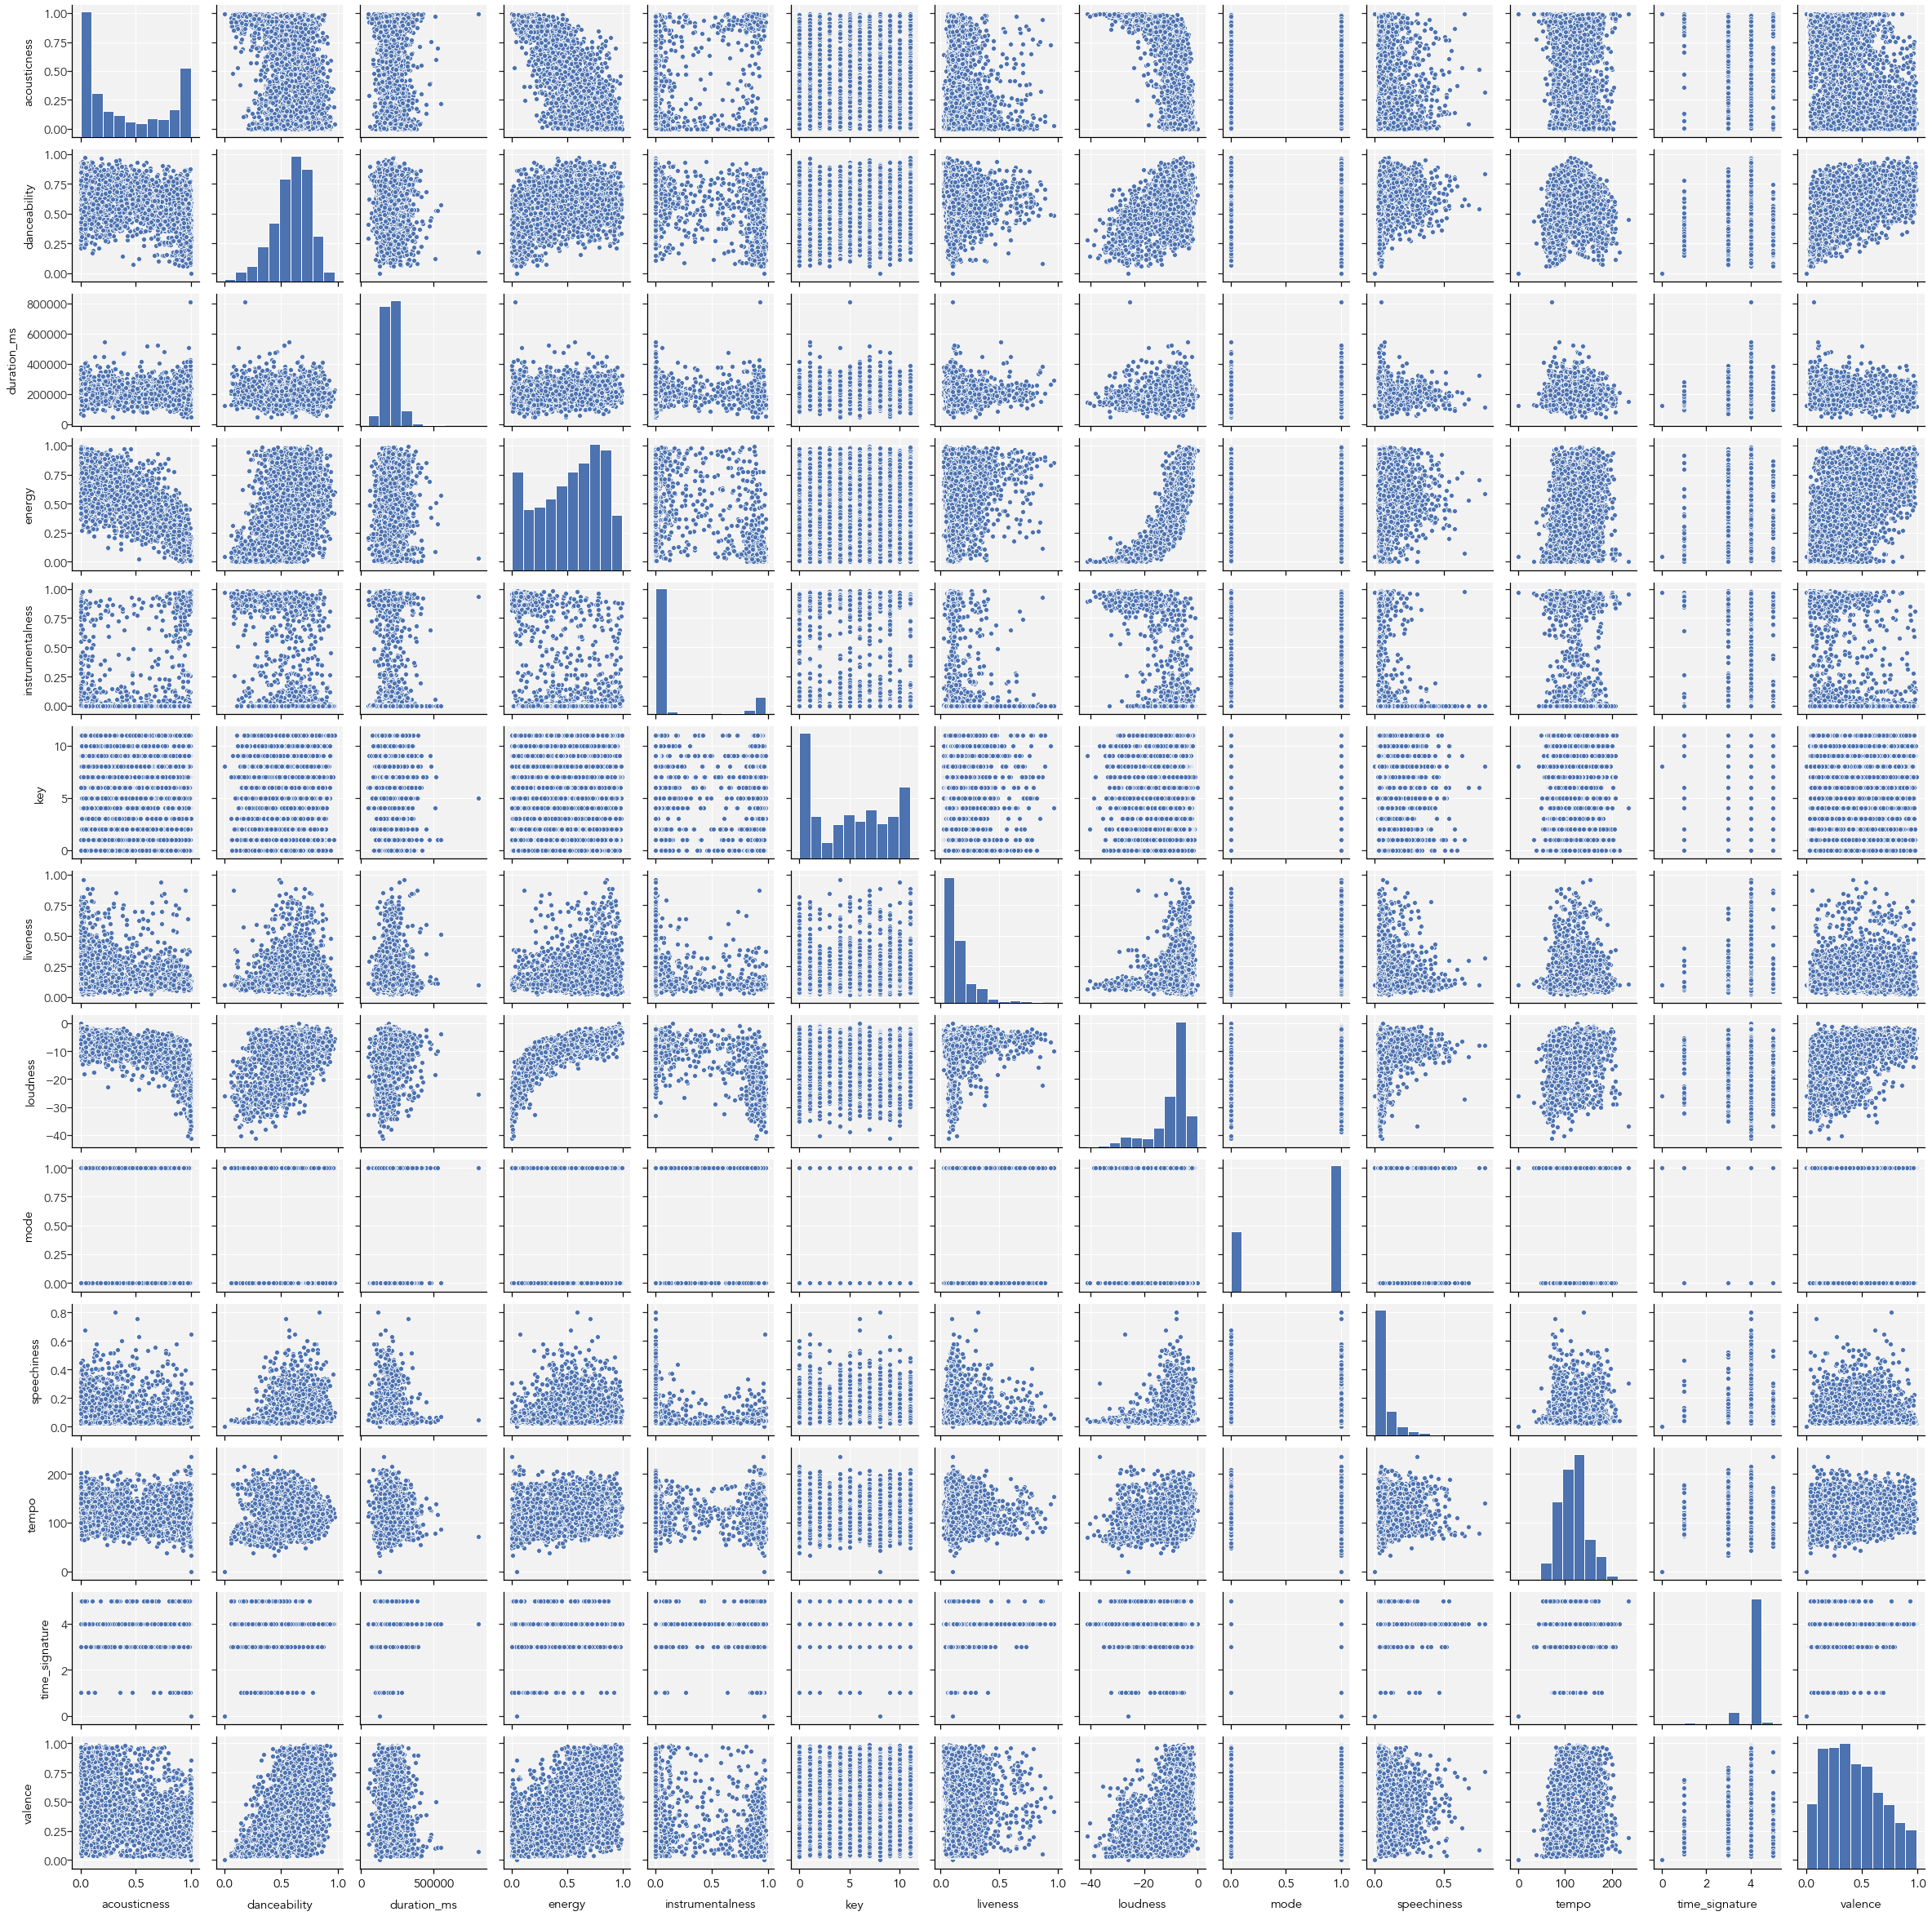

In [51]:
sns.pairplot(songList.loc[:,songList.dtypes == 'float64'])

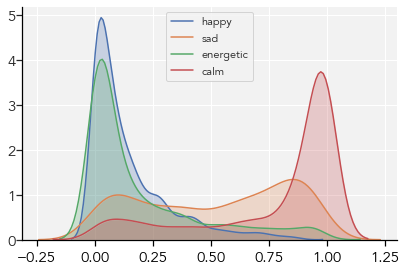

In [64]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    sns.kdeplot(songList[songList['p_mood']==mood]['acousticness'], shade=True,label=mood)

Index(['acousticness', 'analysis_url', 'danceability', 'duration_ms', 'energy',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'p_creator', 'p_mood', 'p_name', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')
acousticness


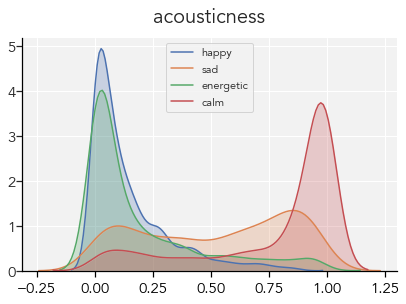

danceability


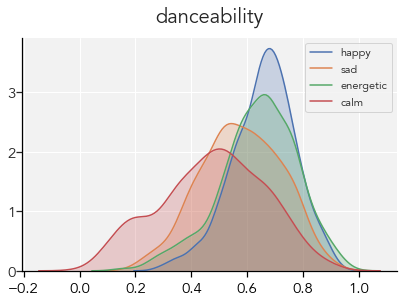

duration_ms


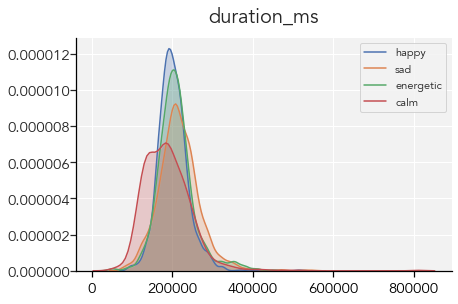

energy


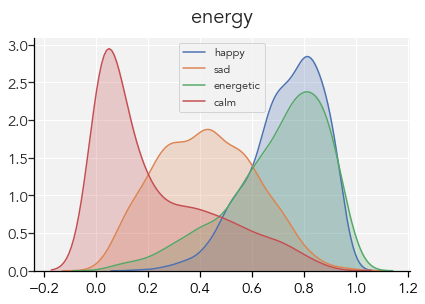

instrumentalness


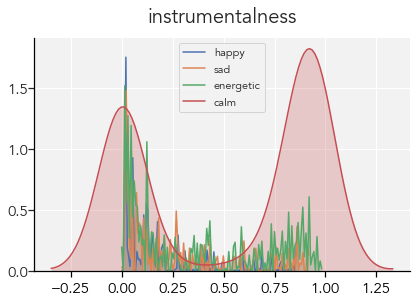

key


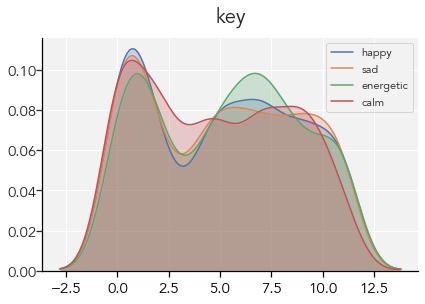

liveness


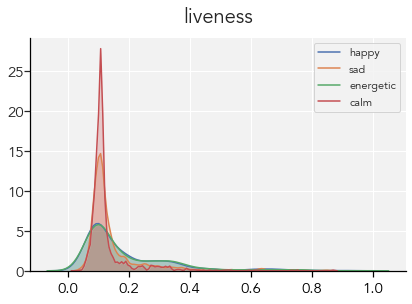

loudness


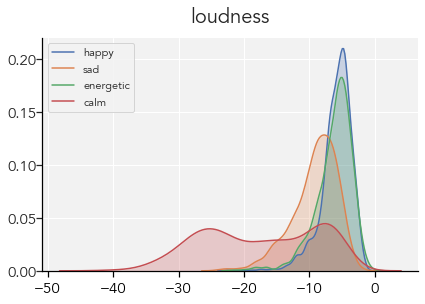

mode


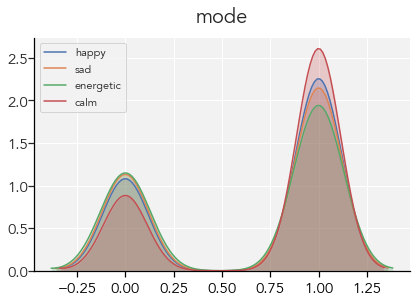

speechiness


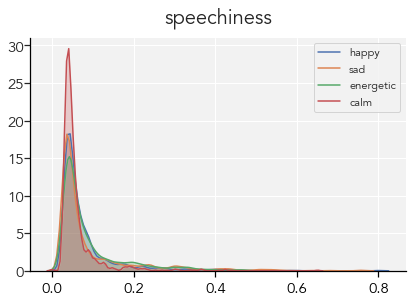

tempo


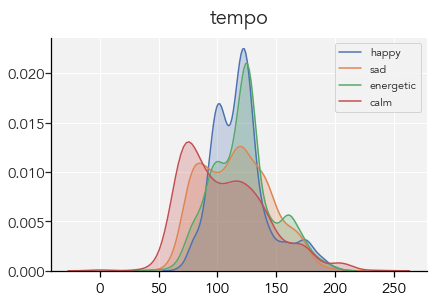

time_signature
didnt work
valence


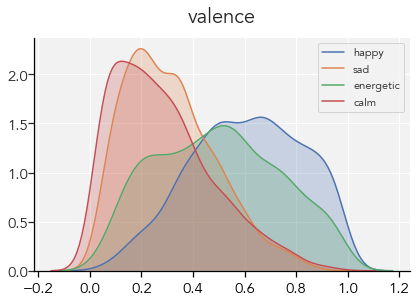

In [65]:
a = songList.dtypes == 'float64'
print(a.index)
for x in range(len(a)):
    
    if(a[x]):
        try:
            print(a.index[x])
            for mood in moods:
                g = sns.kdeplot(songList[songList['p_mood']==mood][a.index[x]], shade=True,label=mood)
            g.set_title(a.index[x])
            plt.show(g)
        except:
            print("didnt work")

happy


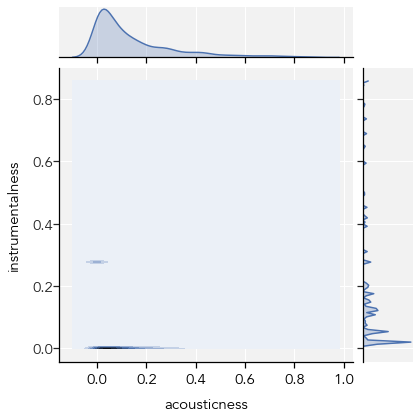

sad


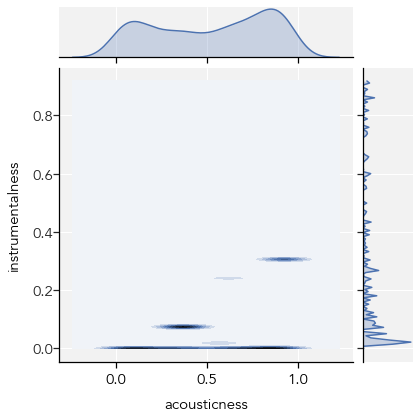

energetic


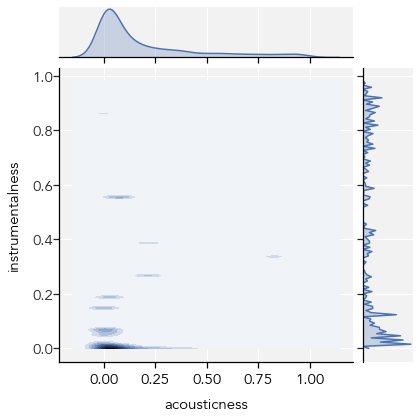

calm


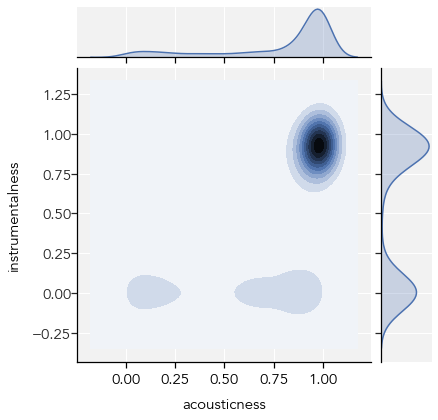

In [54]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    print(mood)
    g = sns.jointplot("acousticness", "instrumentalness", data=songList[songList['p_mood']==mood], kind='kde')
    plt.show(g)

In [17]:
songList[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.26000,0.598,184013.0,0.687,0.000000,7.0,0.1120,-9.021,1.0,0.0955,75.169,4.0,0.626
1,0.03840,0.720,175427.0,0.791,0.000000,1.0,0.1570,-4.689,1.0,0.1240,102.071,4.0,0.756
2,0.00413,0.897,212014.0,0.634,0.000000,4.0,0.0686,-6.264,0.0,0.1610,112.048,4.0,0.506
3,0.53000,0.756,176267.0,0.789,0.000711,2.0,0.1570,-7.002,1.0,0.0324,127.987,4.0,0.873
4,0.07590,0.647,221320.0,0.834,0.000000,1.0,0.3780,-3.258,1.0,0.0956,98.074,4.0,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.72700,0.560,309600.0,0.442,0.000017,5.0,0.1100,-7.224,1.0,0.0243,146.448,4.0,0.212
4679,0.83500,0.376,215829.0,0.468,0.000000,7.0,0.0998,-7.793,1.0,0.0328,154.651,3.0,0.463
4680,0.20000,0.360,319253.0,0.716,0.000000,7.0,0.5810,-6.181,1.0,0.3400,86.001,4.0,0.274
4681,0.84500,0.407,269493.0,0.317,0.000003,10.0,0.1390,-7.895,1.0,0.0429,81.899,4.0,0.216


In [18]:
X = songList[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']].to_numpy()
y = songList['p_mood'].to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(gnb.score(X_test,y_test))
print(gnb.score(X_train,y_train))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

0.5131672597864768
0.5222696766320928
Number of mislabeled points out of a total 1405 points : 684


In [20]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

0.5935943060498221
0.802013422818792
Number of mislabeled points out of a total 1405 points : 571


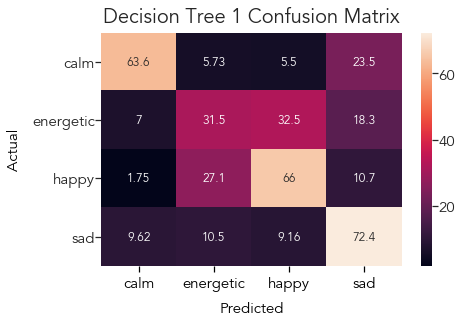

In [56]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)*100
g = sns.heatmap(confusion_matrix, annot=True,fmt='.3g')
g.set_title("Decision Tree 1 Confusion Matrix")
plt.show()

In [21]:
def getscore(num_steps, data,y_var):
    X = data.to_numpy()
    y = y_var.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    clf = tree.DecisionTreeClassifier(max_depth=num_steps).fit(X_train,y_train)
    return [num_steps, clf.score(X_test,y_test), clf.score(X_train,y_train)]

In [22]:
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
variables = ['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']
data = songList[songList['p_mood'] != 'energetic'][['danceability','energy','liveness','loudness','tempo','time_signature','valence']]
y_var = songList[songList['p_mood'] != 'energetic']['p_mood']
data.loc[:,'acousticness_instrumentalness'] = songList.loc[:,'acousticness']*songList.loc[:,'instrumentalness']
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data, y_var)
data

,danceability,energy,liveness,loudness,tempo,time_signature,valence,acousticness_instrumentalness
1025,0.694,0.831,0.2500,-7.288,125.901,4.0,0.980,0.000147
1026,0.720,0.791,0.1570,-4.689,102.071,4.0,0.756,0.000000
1027,0.388,0.338,0.2480,-10.054,177.784,4.0,0.477,0.000002
1028,0.737,0.569,0.0460,-6.702,167.196,4.0,0.912,0.081171
1029,0.647,0.822,0.0908,-4.662,160.019,4.0,0.962,0.000000
...,...,...,...,...,...,...,...,...
4678,0.560,0.442,0.1100,-7.224,146.448,4.0,0.212,0.000012
4679,0.376,0.468,0.0998,-7.793,154.651,3.0,0.463,0.000000
4680,0.360,0.716,0.5810,-6.181,86.001,4.0,0.274,0.000000
4681,0.407,0.317,0.1390,-7.895,81.899,4.0,0.216,0.000002


num_steps      4.000000
test_score     0.740437
train_score    0.767969
Name: 3, dtype: float64


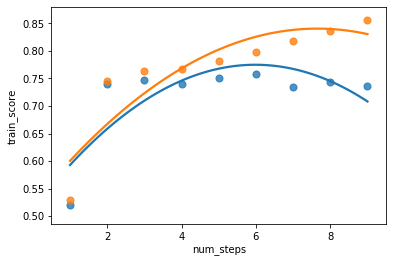

,num_steps,test_score,train_score
0,1.0,0.520947,0.528906
1,2.0,0.739526,0.745313
2,3.0,0.746812,0.763281
3,4.0,0.740437,0.767969
4,5.0,0.751366,0.781250
5,6.0,0.757741,0.797656
6,7.0,0.734062,0.818359
7,8.0,0.744080,0.836328
8,9.0,0.735883,0.857031


In [23]:
print(scoreData.iloc[3,:])
g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
plt.show(g)
scoreData